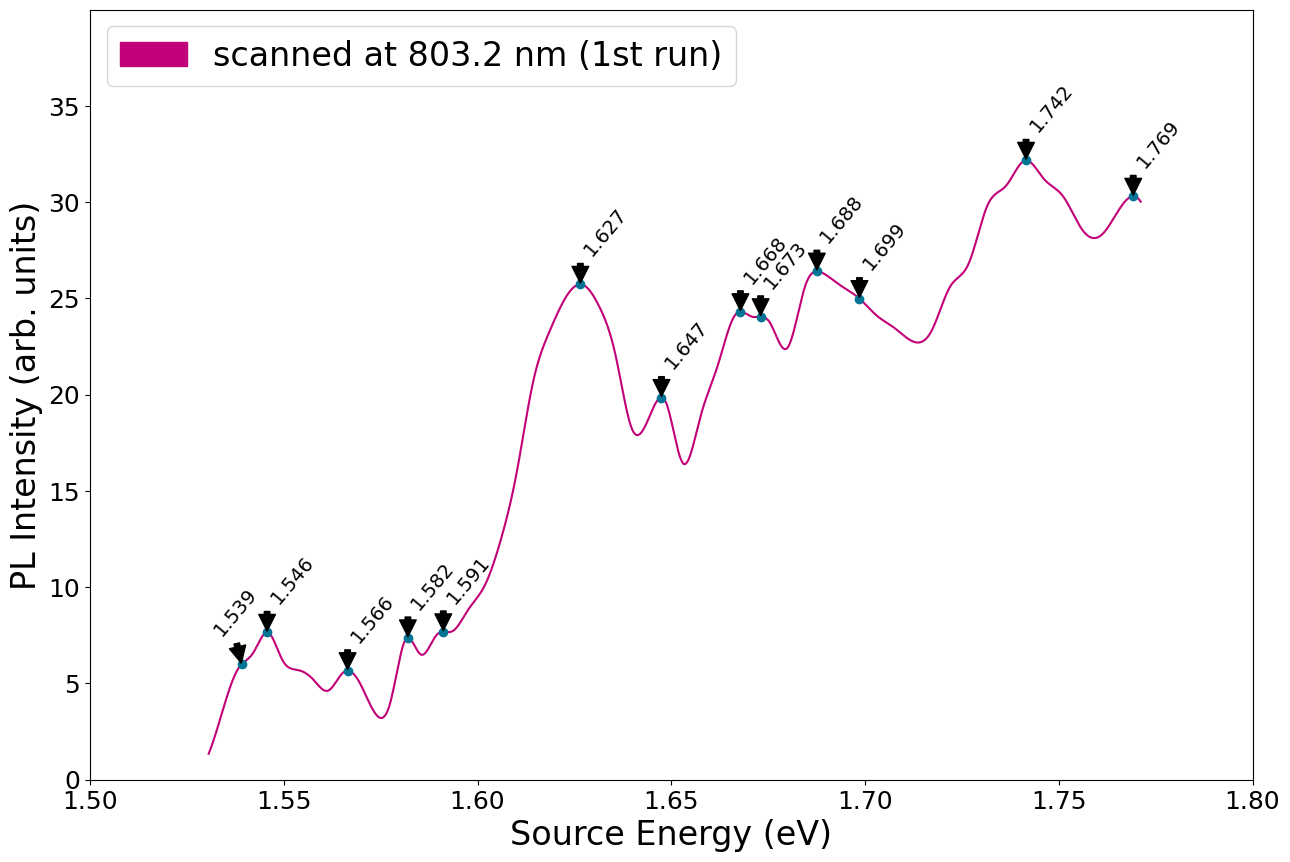

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.interpolate as spi
import scipy.signal as sps
import matplotlib.patches as pltp

#Q046 PLE Data
dataframe1 = pd.read_excel('New PLE Data 2 (bigger focusing lens).xlsx', sheet_name='Q046', usecols=[1])
dataframe2 = pd.read_excel('New PLE Data 2 (bigger focusing lens).xlsx', sheet_name='Q046', usecols=[3])
dataframe3 = pd.read_excel('New PLE Data 2 (bigger focusing lens).xlsx', sheet_name='Q046', usecols=[2])

dataframe1_3 = pd.read_excel('New PLE Data 3.xlsx', sheet_name='Q046', usecols=[1])
dataframe2_3 = pd.read_excel('New PLE Data 3.xlsx', sheet_name='Q046', usecols=[2])
#print(dataframe1)
#print(dataframe2)

#Convert dataframe to 1D arrays
x = dataframe1.to_numpy().reshape(-1)
y = dataframe2.to_numpy().reshape(-1)
z = dataframe3.to_numpy().reshape(-1)

x_3 = dataframe1_3.to_numpy().reshape(-1)
y_3 = dataframe2_3.to_numpy().reshape(-1)

#Making a spline of PLE Data
xnew = np.linspace(x.min(), x.max(), 3000)
gfg = spi.make_interp_spline(x, y, k=3)
y_new = gfg(xnew)

gfg2 = spi.make_interp_spline(x, z, k=3)
z_new = gfg2(xnew)

gfg_3 = spi.make_interp_spline(x_3, y_3, k=3)
y_new_3 = gfg_3(xnew)

#Finding peaks of spline data
peaks, _ = sps.find_peaks(y_new, height=0.1, prominence=0.01)
#print(xnew[peaks])
#print(y_new[peaks])

#peaks2, _ = sps.find_peaks(z_new, height=0.1, prominence=0.01)
#print(xnew[peaks2]) 
#print(z_new[peaks2])

peaks_3, _ = sps.find_peaks(y_new_3, height=0.1, prominence=0.01)
#print(xnew[peaks_3])
#print(y_new_3[peaks_3])

#Font sizes for the plot texts
SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 24

#Setting font sizes for plot elements
plt.rc('font', size=SMALL_SIZE) #controls default text sizes
plt.rc('axes', labelsize=BIGGER_SIZE) #font size of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE) #font size of the x tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE) #font size of the y tick labels
plt.rc('legend', fontsize=BIGGER_SIZE) #legend font size

#Spline plot of data
plt.plot(xnew, y_new, color='xkcd:magenta', label='scanned at 803.2 nm (1st run)')
#plt.plot(xnew, z_new, color='xkcd:blue green', label='scanned at 803.5 nm')

#Plot of data peaks
plt.plot(xnew[peaks], y_new[peaks], "o", color='xkcd:sea blue')
#plt.plot(xnew[peaks2], z_new[peaks2], "o", color='xkcd:light red')

#Labelling peaks with values
plt.plot(xnew[106], y_new[106], "o", color='xkcd:sea blue')
plt.annotate(np.round(xnew[106],3), (xnew[106], y_new[106]), xytext=(xnew[106]-0.008, y_new[106]+1.5), 
                 rotation=50, arrowprops=dict(facecolor='black', shrink=0.05))

plt.plot(xnew[2094], y_new[2094], "o", color='xkcd:sea blue')
plt.annotate(np.round(xnew[2094],3), (xnew[2094], y_new[2094]), xytext=(xnew[2094], y_new[2094]+1.5), 
                 rotation=50, arrowprops=dict(facecolor='black', shrink=0.05))

for i, txt in enumerate(np.round(xnew[peaks],3)):
    plt.annotate(txt, (xnew[peaks][i], y_new[peaks][i]), xytext=(xnew[peaks][i], y_new[peaks][i]+1.5), 
                 rotation=50, arrowprops=dict(facecolor='black', shrink=0.05))

#Making patches for legend
patch_1 = pltp.Patch(label='scanned at 803.2 nm (1st run)', color='xkcd:magenta')
#patch_2 = pltp.Patch(label='scanned at 803.5 nm', color='xkcd:blue green')
patch_3 = pltp.Patch(label='scanned at 803.2 nm (2nd run)', color='xkcd:blue green')

plt.gcf().set_size_inches(15, 10) #sets the size of the plot
plt.legend(handles=[patch_1], loc='upper left') #inserts legend in the plot
plt.xlabel('Source Energy (eV)') #label for the x-axis
plt.ylabel('PL Intensity (arb. units)') #label for the y-axis
plt.xlim(1.5,1.8) #sets limit values for x-axis
plt.ylim(0,40) #sets limit values for y-axis
plt.xticks(np.arange(1.5,1.8, step=0.05)) #sets x-axis tick values
plt.yticks(np.arange(0,40,step=5)) #sets y-axis tick values
plt.show()

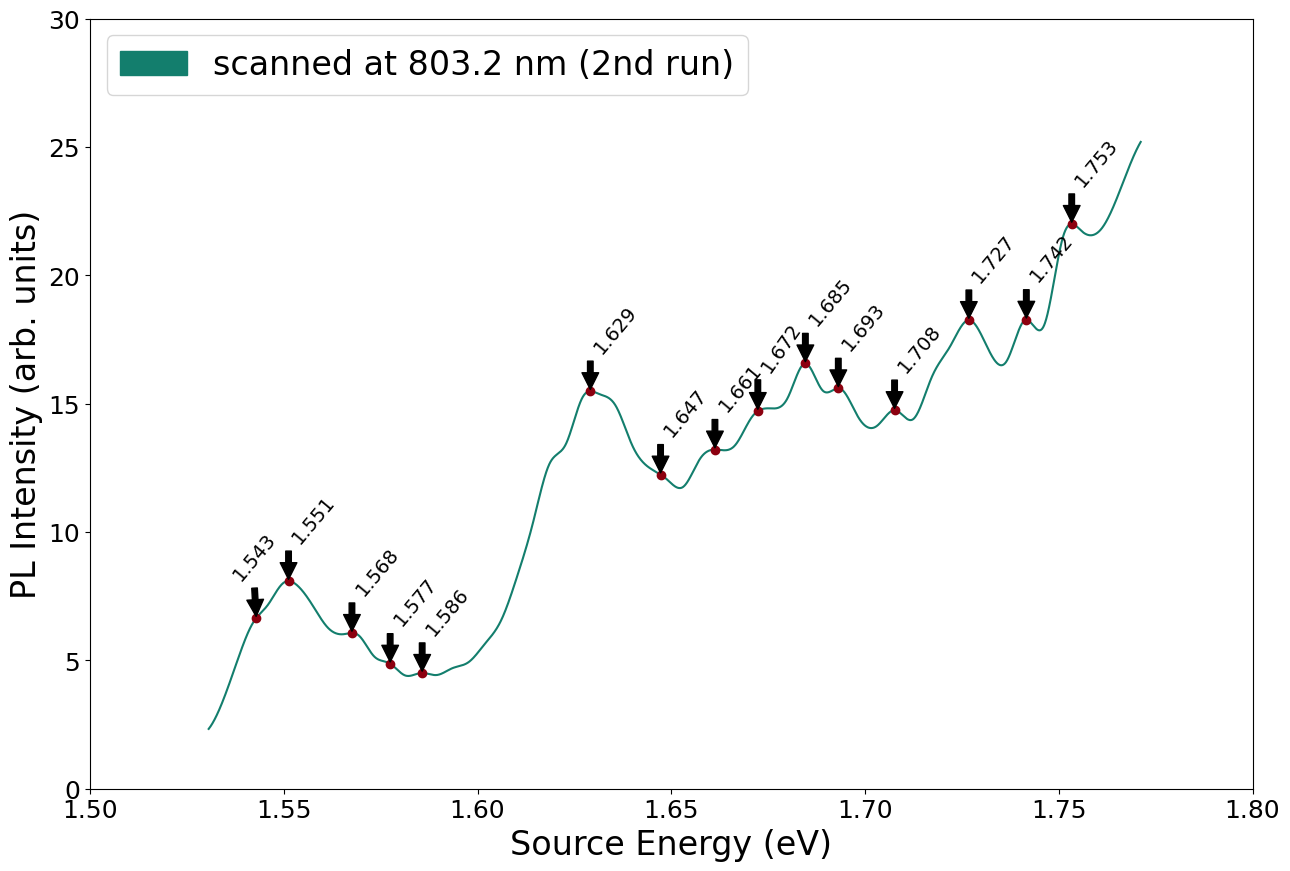

In [2]:
plt.plot(xnew, y_new_3, color='xkcd:blue green', label='scanned at 803.2 nm (2nd run)')
plt.plot(xnew[peaks_3], y_new_3[peaks_3], "o", color='xkcd:crimson')

#Labelling peaks with values
for i, txt in enumerate(np.round(xnew[peaks_3],3)):
    plt.annotate(txt, (xnew[peaks_3][i], y_new_3[peaks_3][i]), xytext=(xnew[peaks_3][i], y_new_3[peaks_3][i]+1.5), 
                 rotation=50, arrowprops=dict(facecolor='black', shrink=0.05))

plt.plot(xnew[153], y_new_3[153], "o", color='xkcd:crimson')
plt.annotate(np.round(xnew[153],3), (xnew[153], y_new_3[153]), xytext=(xnew[153]-0.007, y_new_3[153]+1.5), 
                 rotation=50, arrowprops=dict(facecolor='black', shrink=0.05))

plt.plot(xnew[584], y_new_3[584], "o", color='xkcd:crimson')
plt.annotate(np.round(xnew[584],3), (xnew[584], y_new_3[584]), xytext=(xnew[584], y_new_3[584]+1.5), 
                 rotation=50, arrowprops=dict(facecolor='black', shrink=0.05))

plt.plot(xnew[1454], y_new_3[1454], "o", color='xkcd:crimson')
plt.annotate(np.round(xnew[1454],3), (xnew[1454], y_new_3[1454]), xytext=(xnew[1454], y_new_3[1454]+1.5), 
                 rotation=50, arrowprops=dict(facecolor='black', shrink=0.05))

plt.plot(xnew[1767], y_new_3[1767], "o", color='xkcd:crimson')
plt.annotate(np.round(xnew[1767],3), (xnew[1767], y_new_3[1767]), xytext=(xnew[1767], y_new_3[1767]+1.55), 
                 rotation=55, arrowprops=dict(facecolor='black', shrink=0.05))

plt.gcf().set_size_inches(15, 10) #sets the size of the plot
plt.legend(handles=[patch_3], loc='upper left') #inserts legend in the plot
plt.xlabel('Source Energy (eV)') #label for the x-axis
plt.ylabel('PL Intensity (arb. units)') #label for the y-axis
plt.xlim(1.5,1.8) #sets limit values for x-axis
plt.ylim(0,30) #sets limit values for y-axis
plt.xticks(np.arange(1.5,1.8, step=0.05)) #sets x-axis tick values
plt.yticks(np.arange(0,31,step=5)) #sets y-axis tick values
plt.show()

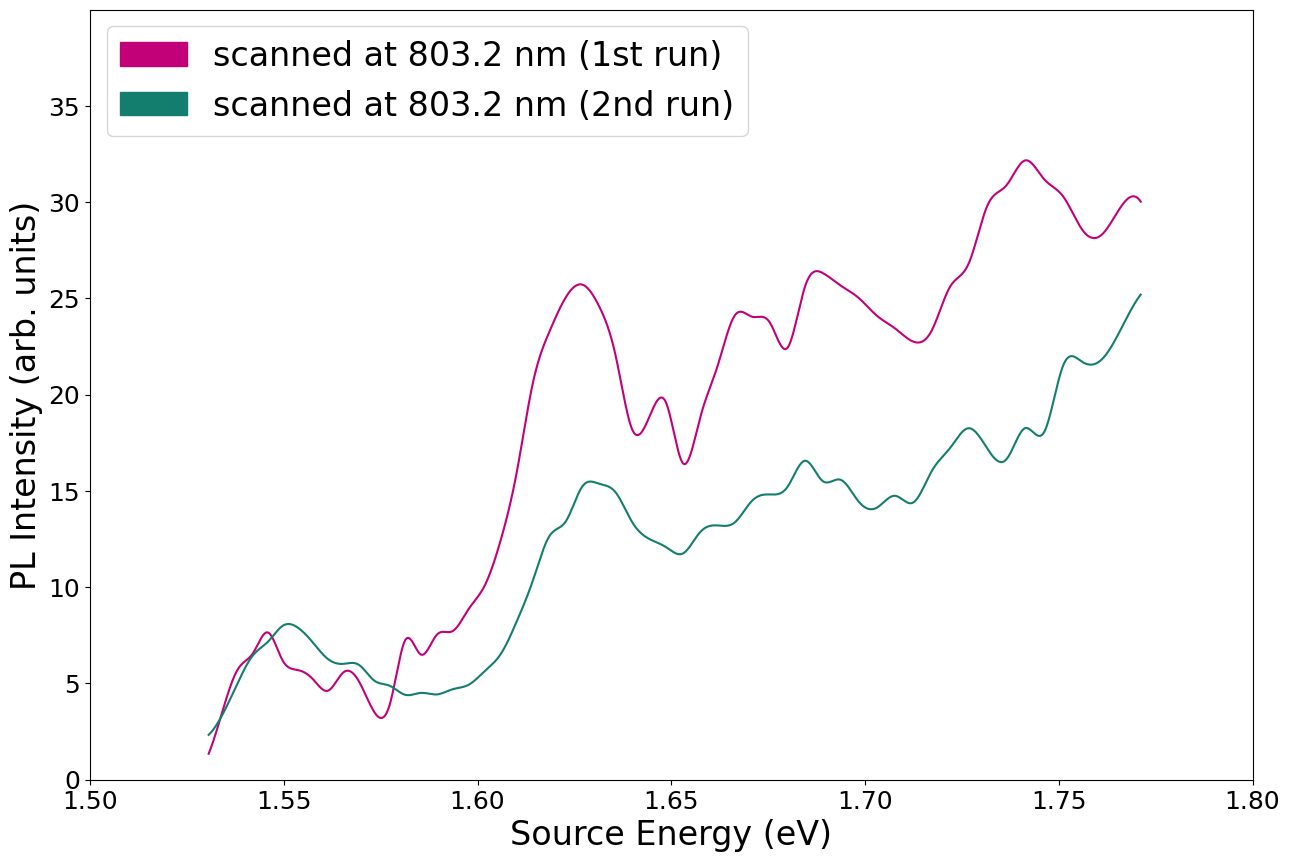

In [3]:
#Spline plot of data
plt.plot(xnew, y_new, color='xkcd:magenta', label='scanned at 803.2 nm (1st run)')
#plt.plot(xnew, z_new, color='xkcd:blue green', label='scanned at 803.5 nm')
plt.plot(xnew, y_new_3, color='xkcd:blue green', label='scanned at 803.2 nm (2nd run)')

plt.gcf().set_size_inches(15, 10) #sets the size of the plot
plt.legend(handles=[patch_1,patch_3], loc='upper left') #inserts legend in the plot
plt.xlabel('Source Energy (eV)') #label for the x-axis
plt.ylabel('PL Intensity (arb. units)') #label for the y-axis
plt.xlim(1.5,1.8) #sets limit values for x-axis
plt.ylim(0,40) #sets limit values for y-axis
plt.xticks(np.arange(1.5,1.8, step=0.05)) #sets x-axis tick values
plt.yticks(np.arange(0,40,step=5)) #sets y-axis tick values
plt.show()

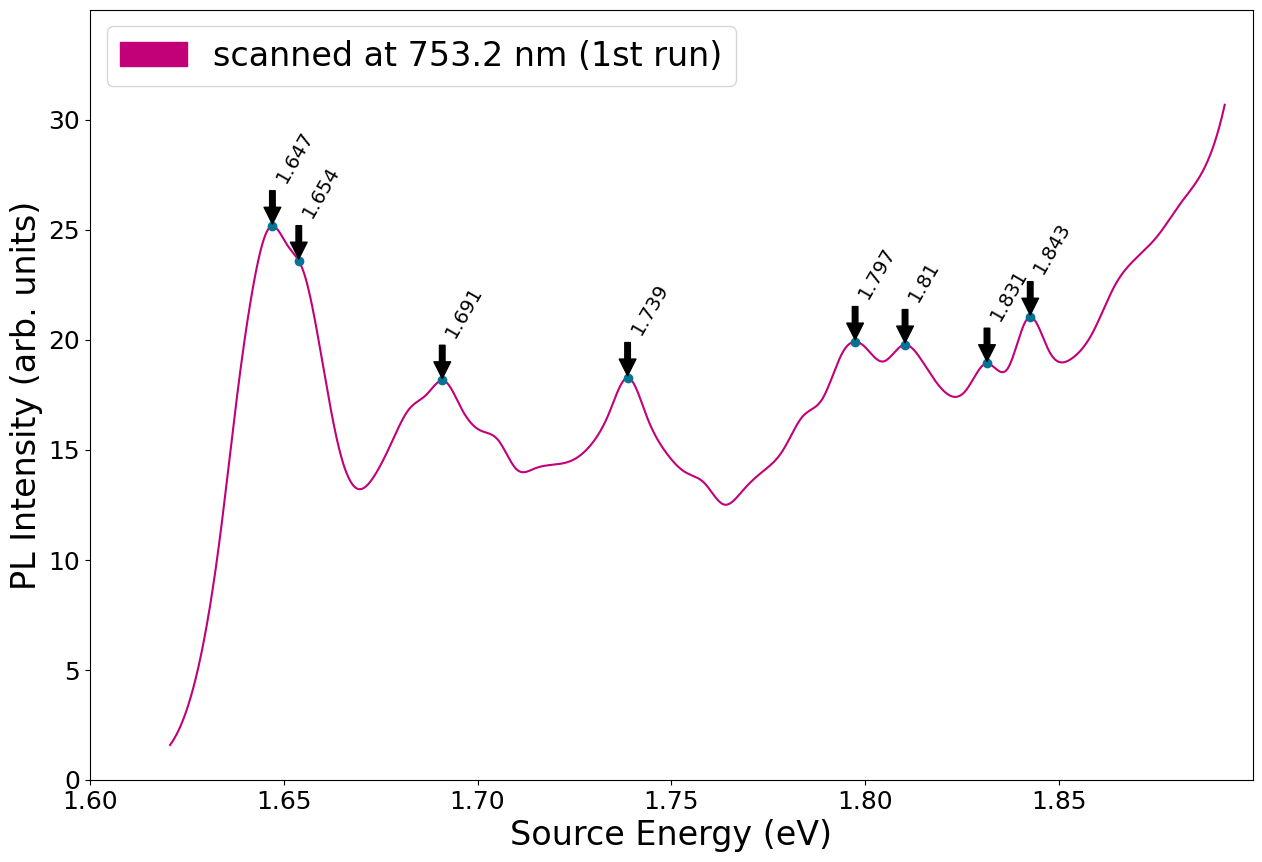

In [4]:
# Q044OFF PLE Data
dataframe4 = pd.read_excel('New PLE Data 2 (bigger focusing lens).xlsx', sheet_name='Q044 OFF', usecols=[1])
dataframe5 = pd.read_excel('New PLE Data 2 (bigger focusing lens).xlsx', sheet_name='Q044 OFF', usecols=[2])
dataframe6 = pd.read_excel('New PLE Data 2 (bigger focusing lens).xlsx', sheet_name='Q044 OFF', usecols=[3])

dataframe4_3 = pd.read_excel('New PLE Data 3.xlsx', sheet_name='Q044 OFF', usecols=[1])
dataframe5_3 = pd.read_excel('New PLE Data 3.xlsx', sheet_name='Q044 OFF', usecols=[2])

#Convert dataframe to 1D arrays
x4 = dataframe4.to_numpy().reshape(-1)
y5 = dataframe5.to_numpy().reshape(-1)
z6 = dataframe6.to_numpy().reshape(-1)

x4_3 = dataframe4_3.to_numpy().reshape(-1)
y5_3 = dataframe5_3.to_numpy().reshape(-1)

#Making a spline of PLE Data
xnew44 = np.linspace(x4.min(), x4.max(), 3000)
gfg44 = spi.make_interp_spline(x4, y5, k=3)
y_new44 = gfg44(xnew44)

gfg442 = spi.make_interp_spline(x4, z6, k=3)
z_new44 = gfg442(xnew44)

gfg44_3 = spi.make_interp_spline(x4_3, y5_3, k=3)
y_new44_3 = gfg44_3(xnew44)

#Finding peaks of spline data
#peaks44, _ = sps.find_peaks(y_new44, height=0.1, prominence=0.01)
#print(xnew44[peaks44])
#print(y_new44[peaks44])

peaks442, _ = sps.find_peaks(z_new44, height=0.1, prominence=0.01)
#print(xnew44[peaks442])
#print(z_new44[peaks442])

peaks44_3, _ = sps.find_peaks(y_new44_3, height=0.1, prominence=0.01)
#print(xnew44[peaks44])
#print(y_new44[peaks44])

#Spline plot of data
#plt.plot(xnew44, y_new44, color='xkcd:blue green', label='scanned at 753.5 nm')
plt.plot(xnew44, z_new44, color='xkcd:magenta', label='scanned at 753.2 nm (1st run)')
#plt.plot(xnew44, y_new44_3, color='xkcd:blue green', label='scanned at 753.2 nm (2nd run)')

#print(np.where(xnew44<1.654))
#np.set_printoptions(threshold=np.inf)
#print(z_new44)

#Plot of data peaks
#plt.plot(xnew44[peaks44], y_new44[peaks44], "o", color='xkcd:crimson')
plt.plot(xnew44[peaks442], z_new44[peaks442], "o", color='xkcd:sea blue')
#plt.plot(xnew44[peaks44_3], y_new44_3[peaks44_3], "o", color='xkcd:crimson')

#Labelling peaks with values
for i, txt in enumerate(np.round(xnew44[peaks442],3)):
    plt.annotate(txt, (xnew44[peaks442][i], z_new44[peaks442][i]), xytext=(xnew44[peaks442][i], z_new44[peaks442][i]+2), 
                 rotation=60, arrowprops=dict(facecolor='black', shrink=0.05))

plt.plot(xnew44[366], z_new44[366], "o", color='xkcd:sea blue')
plt.annotate(np.round(xnew44[366],3), (xnew44[366], z_new44[366]), xytext=(xnew44[366], z_new44[366]+2), 
                 rotation=60, arrowprops=dict(facecolor='black', shrink=0.05))

#Making patches for legend
#patch_4 = pltp.Patch(label='scanned at 753.5 nm', color='xkcd:blue green')
patch_5 = pltp.Patch(label='scanned at 753.2 nm (1st run)', color='xkcd:magenta')
patch_6 = pltp.Patch(label='scanned at 753.2 nm (2nd run)', color='xkcd:blue green')

plt.gcf().set_size_inches(15, 10) #sets the size of the plot
plt.legend(handles=[patch_5],loc='upper left') #inserts legend in the plot
plt.xlabel('Source Energy (eV)') #label for the x-axis
plt.ylabel('PL Intensity (arb. units)') #label for the y-axis
plt.xlim(1.6,1.9) #sets limit values for x-axis
plt.ylim(0,35) #sets limit values for y-axis
plt.xticks(np.arange(1.6,1.9, step=0.05)) #sets x-axis tick values
plt.yticks(np.arange(0,35,step=5)) #sets y-axis tick values
plt.show()

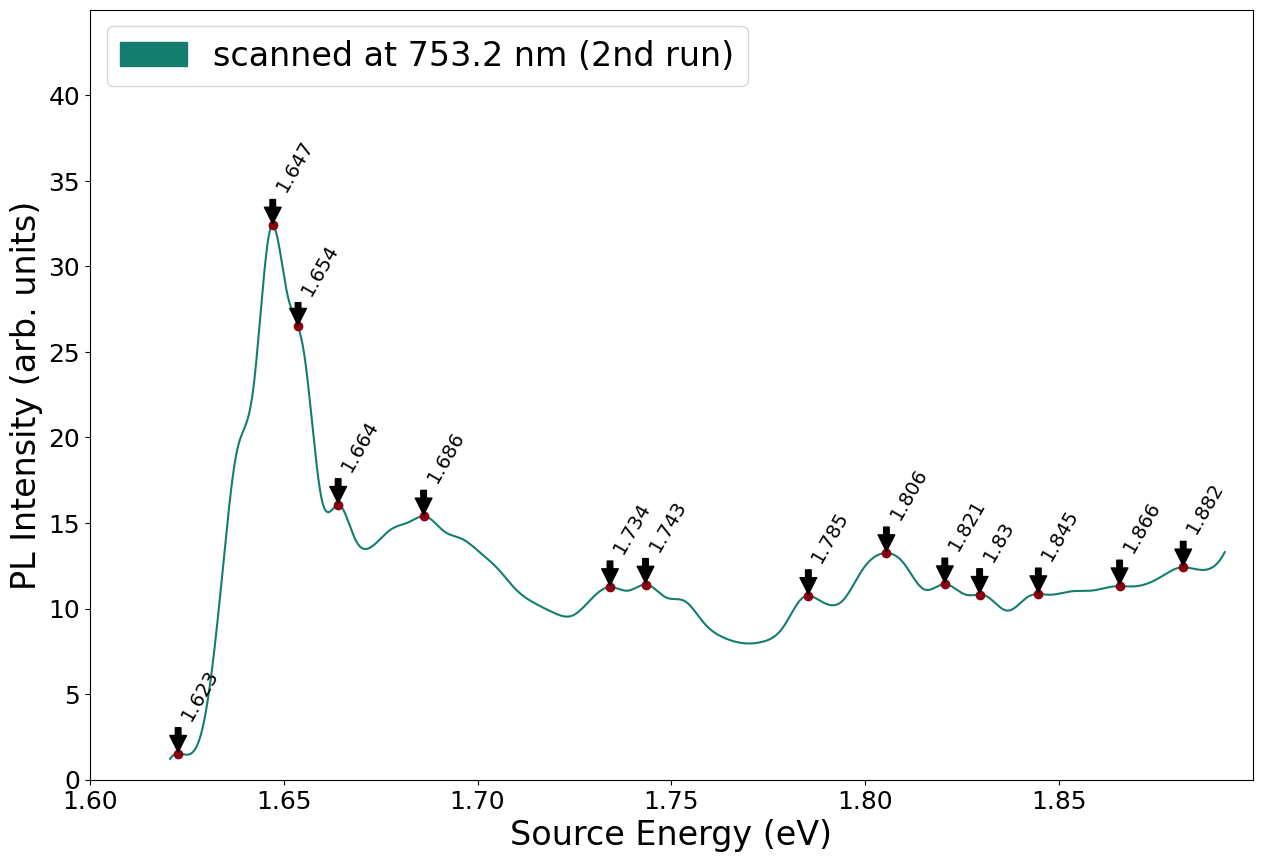

In [5]:
plt.plot(xnew44, y_new44_3, color='xkcd:blue green', label='scanned at 753.2 nm (2nd run)')
plt.plot(xnew44[peaks44_3], y_new44_3[peaks44_3], "o", color='xkcd:crimson')

#Labelling peaks with values
for i, txt in enumerate(np.round(xnew44[peaks44_3],3)):
    plt.annotate(txt, (xnew44[peaks44_3][i], y_new44_3[peaks44_3][i]), xytext=(xnew44[peaks44_3][i], y_new44_3[peaks44_3][i]+2), 
                 rotation=60, arrowprops=dict(facecolor='black', shrink=0.05))

plt.plot(xnew44[364], y_new44_3[364], "o", color='xkcd:crimson')
plt.annotate(np.round(xnew44[364],3), (xnew44[364], y_new44_3[364]), xytext=(xnew44[364], y_new44_3[366]+2), 
                 rotation=60, arrowprops=dict(facecolor='black', shrink=0.05))

plt.gcf().set_size_inches(15, 10) #sets the size of the plot
plt.legend(handles=[patch_6],loc='upper left') #inserts legend in the plot
plt.xlabel('Source Energy (eV)') #label for the x-axis
plt.ylabel('PL Intensity (arb. units)') #label for the y-axis
plt.xlim(1.6,1.9) #sets limit values for x-axis
plt.ylim(0,45) #sets limit values for y-axis
plt.xticks(np.arange(1.6,1.9, step=0.05)) #sets x-axis tick values
plt.yticks(np.arange(0,45,step=5)) #sets y-axis tick values
plt.show()

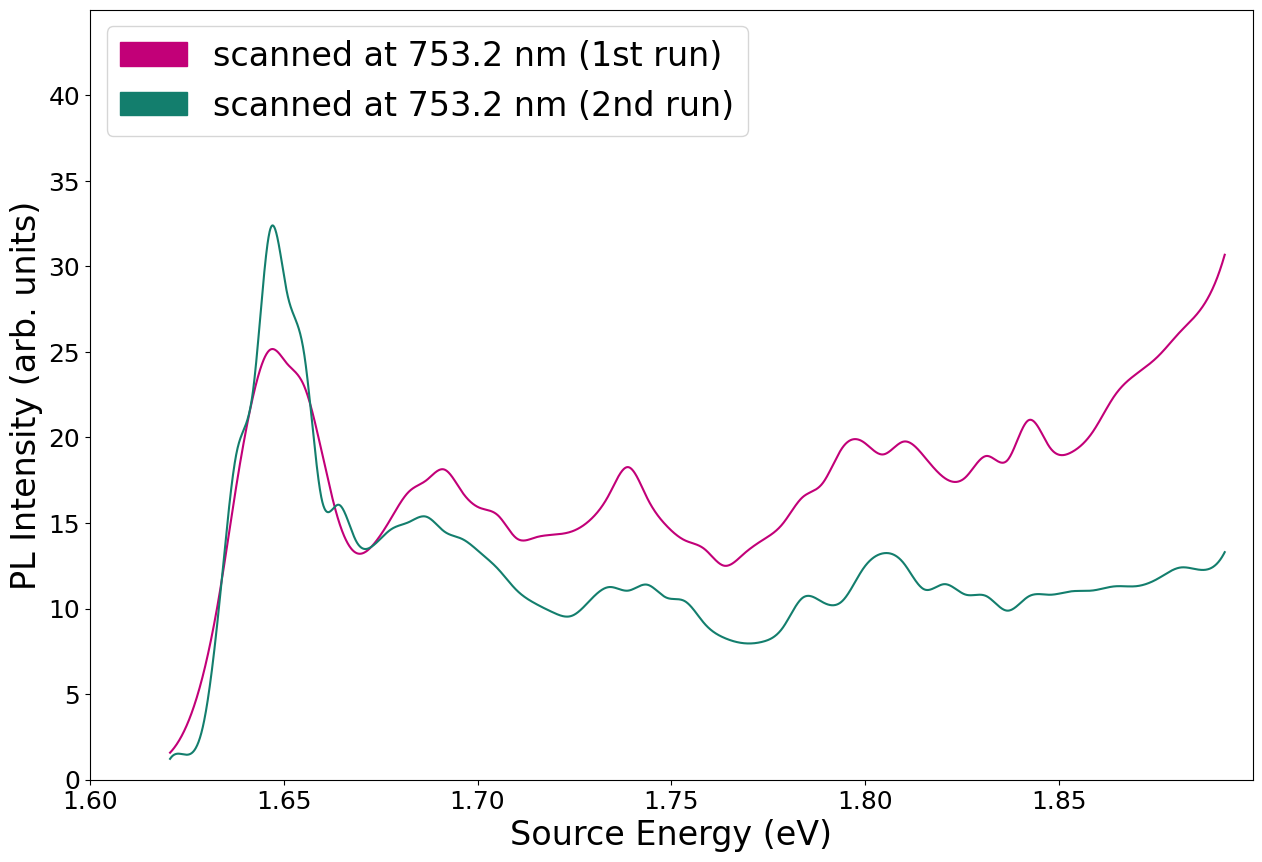

In [6]:
#Spline plot of data
#plt.plot(xnew44, y_new44, color='xkcd:blue green', label='scanned at 753.5 nm')
plt.plot(xnew44, z_new44, color='xkcd:magenta', label='scanned at 753.2 nm (1st run)')
plt.plot(xnew44, y_new44_3, color='xkcd:blue green', label='scanned at 753.2 nm (2nd run)')

plt.gcf().set_size_inches(15, 10) #sets the size of the plot
plt.legend(handles=[patch_5,patch_6],loc='upper left') #inserts legend in the plot
plt.xlabel('Source Energy (eV)') #label for the x-axis
plt.ylabel('PL Intensity (arb. units)') #label for the y-axis
plt.xlim(1.6,1.9) #sets limit values for x-axis
plt.ylim(0,45) #sets limit values for y-axis
plt.xticks(np.arange(1.6,1.9, step=0.05)) #sets x-axis tick values
plt.yticks(np.arange(0,45,step=5)) #sets y-axis tick values
plt.show()

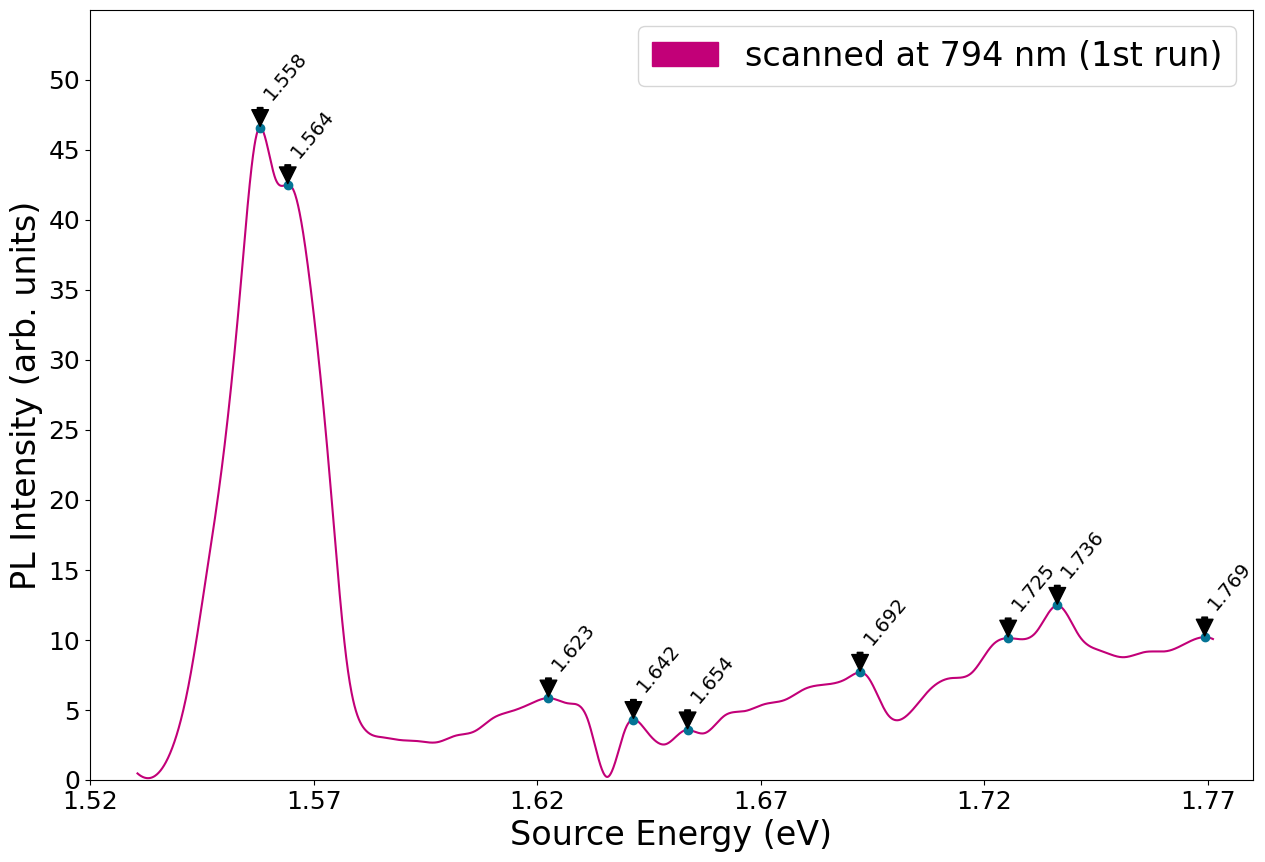

In [7]:
#Q040 PLE Data
dataframe7 = pd.read_excel('New PLE Data 2 (bigger focusing lens).xlsx', sheet_name='Q040', usecols=[1])
dataframe8 = pd.read_excel('New PLE Data 2 (bigger focusing lens).xlsx', sheet_name='Q040', usecols=[3])
dataframe9 = pd.read_excel('New PLE Data 2 (bigger focusing lens).xlsx', sheet_name='Q040', usecols=[5])

dataframe7_3 = pd.read_excel('New PLE Data 3.xlsx', sheet_name='Q040', usecols=[1])
dataframe8_3 = pd.read_excel('New PLE Data 3.xlsx', sheet_name='Q040', usecols=[2])
dataframe9_3 = pd.read_excel('New PLE Data 3.xlsx', sheet_name='Q040', usecols=[3])

#Convert dataframe to 1D arrays
x7 = dataframe7.to_numpy().reshape(-1)
y8 = dataframe8.to_numpy().reshape(-1)
z9 = dataframe9.to_numpy().reshape(-1)

x7_3 = dataframe7_3.to_numpy().reshape(-1)
y8_3 = dataframe8_3.to_numpy().reshape(-1)
z9_3 = dataframe9_3.to_numpy().reshape(-1)

#Making a spline of PLE Data
xnew40 = np.linspace(x7.min(), x7.max(), 3000)
gfg40 = spi.make_interp_spline(x7, y8, k=3)
y_new40 = gfg40(xnew40)

gfg402 = spi.make_interp_spline(x7, z9, k=3)
z_new40 = gfg402(xnew40)

gfg40_3 = spi.make_interp_spline(x7_3, y8_3, k=3)
y_new40_3 = gfg40_3(xnew40)

gfg402_3 = spi.make_interp_spline(x7_3, z9_3, k=3)
z_new40_3 = gfg402_3(xnew40)

#Finding peaks of spline data
#peaks40, _ = sps.find_peaks(y_new40, height=0.1, prominence=0.01)
#print(xnew40[peaks40])
#print(y_new40[peaks40])

peaks402, _ = sps.find_peaks(z_new40, height=0.1, prominence=0.01)
#print(xnew40[peaks402])
#print(z_new40[peaks402])

peaks40_3, _ = sps.find_peaks(y_new40_3, height=0.1, prominence=0.01)
#print(xnew40[peaks40_3])
#print(y_new40_3[peaks40_3])

peaks402_3, _ = sps.find_peaks(z_new40_3, height=0.1, prominence=0.01)
#print(xnew40[peaks402_3])
#print(z_new40_3[peaks402_3])

#Spline plot of data
#plt.plot(xnew40, y_new40, color='xkcd:blue green', label='scanned at 795 nm')
plt.plot(xnew40, z_new40, color='xkcd:magenta', label='scanned at 794 nm (1st run)')
#plt.plot(xnew40, y_new40_3, color='xkcd:blue green', label='scanned at 794 nm (2nd run A)')
#plt.plot(xnew40, z_new40_3, color='xkcd:indigo', label='scanned at 804 nm (2nd run B)')

#Plot of data peaks
#plt.plot(xnew40[peaks40], y_new40[peaks40], "o", color='xkcd:crimson')
plt.plot(xnew40[peaks402], z_new40[peaks402], "o", color='xkcd:sea blue')
#plt.plot(xnew40[peaks40_3], y_new40_3[peaks40_3], "o", color='xkcd:crimson')
#plt.plot(xnew40[peaks402)3], z_new40_3[peaks402_3], "o", color='xkcd:tomato')

#Labelling peaks with values
for i, txt in enumerate(np.round(xnew40[peaks402],3)):
    plt.annotate(txt, (xnew40[peaks402][i], z_new40[peaks402][i]), xytext=(xnew40[peaks402][i], z_new40[peaks402][i]+2), 
                 rotation=50, arrowprops=dict(facecolor='black', shrink=0.05))

#Making patches for legend
#patch_7 = pltp.Patch(label='scanned at 795 nm', color='xkcd:blue green')
patch_8 = pltp.Patch(label='scanned at 794 nm (1st run)', color='xkcd:magenta')
patch_9 = pltp.Patch(label='scanned at 794 nm (2nd run A)', color='xkcd:blue green')
patch_10 = pltp.Patch(label='scanned at 804 nm (2nd run B)', color='xkcd:indigo')

plt.gcf().set_size_inches(15, 10) #sets the size of the plot
plt.legend(handles=[patch_8], loc='upper right') #inserts legend in the plot
plt.xlabel('Source Energy (eV)') #label for the x-axis
plt.ylabel('PL Intensity (arb. units)') #label for the y-axis
plt.xlim(1.52,1.78) #sets limit values for x-axis
plt.ylim(0,55) #sets limit values for y-axis
plt.xticks(np.arange(1.52,1.78, step=0.05)) #sets x-axis tick values
plt.yticks(np.arange(0,55,step=5)) #sets y-axis tick values
plt.show()

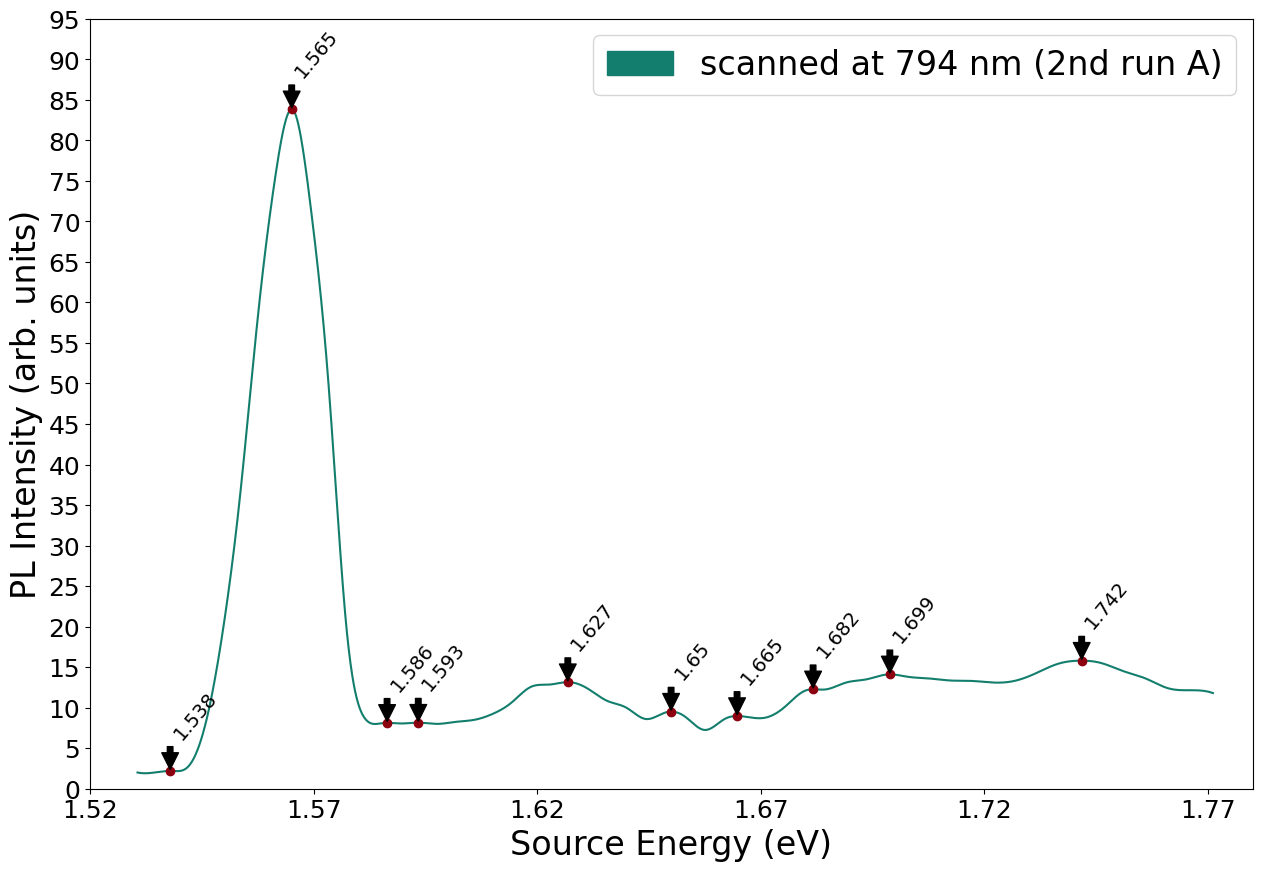

In [8]:
#Spline plot of data
#plt.plot(xnew40, y_new40, color='xkcd:blue green', label='scanned at 795 nm')
#plt.plot(xnew40, z_new40, color='xkcd:magenta', label='scanned at 794 nm (1st run)')
plt.plot(xnew40, y_new40_3, color='xkcd:blue green', label='scanned at 794 nm (2nd run A)')
#plt.plot(xnew40, z_new40_3, color='xkcd:indigo', label='scanned at 804 nm (2nd run B)')

#Plot of data peaks
#plt.plot(xnew40[peaks40], y_new40[peaks40], "o", color='xkcd:crimson')
#plt.plot(xnew40[peaks402], z_new40[peaks402], "o", color='xkcd:sea blue')
plt.plot(xnew40[peaks40_3], y_new40_3[peaks40_3], "o", color='xkcd:crimson')
#plt.plot(xnew40[peaks402_3], z_new40_3[peaks402_3], "o", color='xkcd:tomato')

#Labelling peaks with values
for i, txt in enumerate(np.round(xnew40[peaks40_3],3)):
    plt.annotate(txt, (xnew40[peaks40_3][i], y_new40_3[peaks40_3][i]), xytext=(xnew40[peaks40_3][i], y_new40_3[peaks40_3][i]+4), 
                 rotation=50, arrowprops=dict(facecolor='black', shrink=0.05))

plt.gcf().set_size_inches(15, 10) #sets the size of the plot
plt.legend(handles=[patch_9], loc='upper right') #inserts legend in the plot
plt.xlabel('Source Energy (eV)') #label for the x-axis
plt.ylabel('PL Intensity (arb. units)') #label for the y-axis
plt.xlim(1.52,1.78) #sets limit values for x-axis
plt.ylim(0,95) #sets limit values for y-axis
plt.xticks(np.arange(1.52,1.78, step=0.05)) #sets x-axis tick values
plt.yticks(np.arange(0,96,step=5)) #sets y-axis tick values
plt.show()

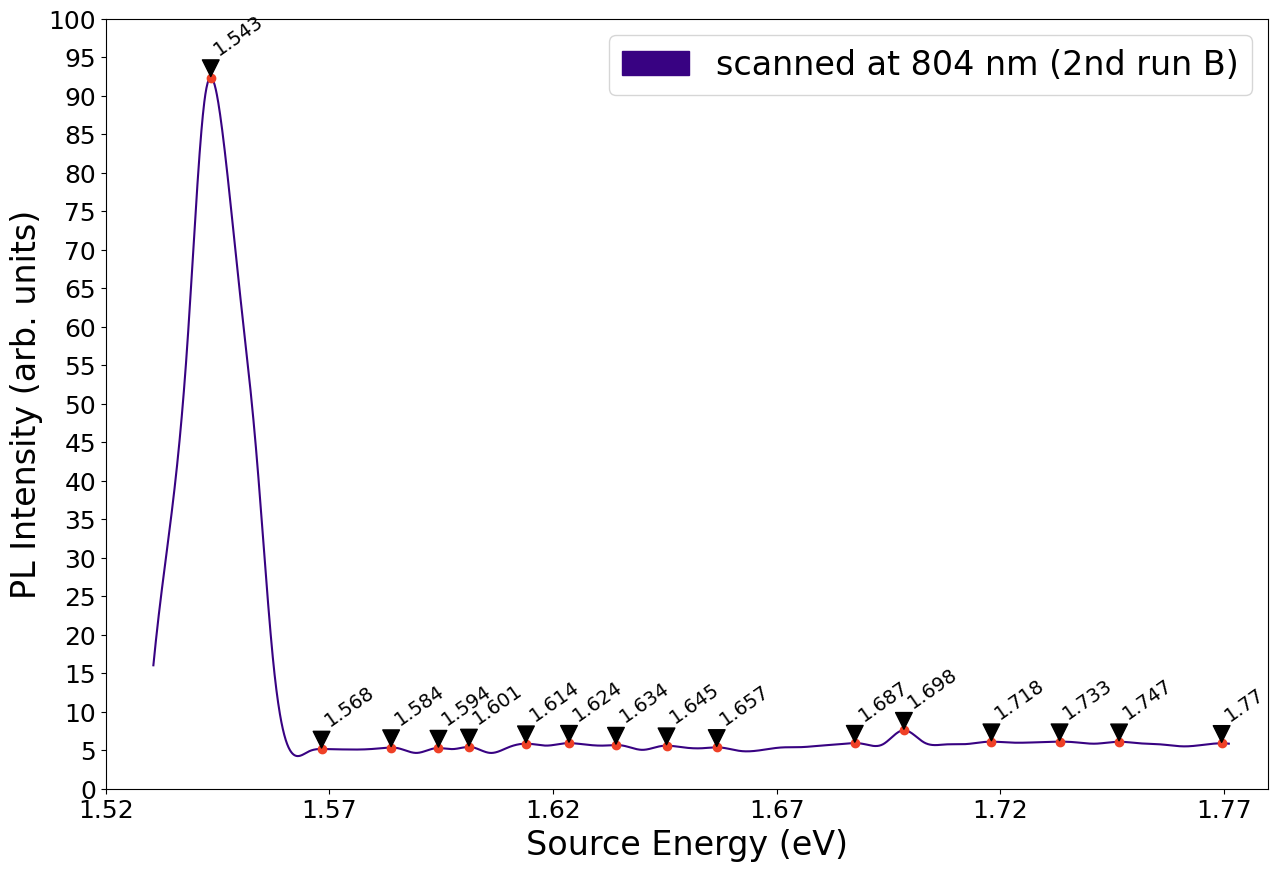

In [9]:
#Spline plot of data
#plt.plot(xnew40, y_new40, color='xkcd:blue green', label='scanned at 795 nm')
#plt.plot(xnew40, z_new40, color='xkcd:magenta', label='scanned at 794 nm (1st run)')
#plt.plot(xnew40, y_new40_3, color='xkcd:blue green', label='scanned at 794 nm (2nd run A)')
plt.plot(xnew40, z_new40_3, color='xkcd:indigo', label='scanned at 804 nm (2nd run B)')

#Plot of data peaks
#plt.plot(xnew40[peaks40], y_new40[peaks40], "o", color='xkcd:crimson')
#plt.plot(xnew40[peaks402], z_new40[peaks402], "o", color='xkcd:sea blue')
#plt.plot(xnew40[peaks40_3], y_new40_3[peaks40_3], "o", color='xkcd:crimson')
plt.plot(xnew40[peaks402_3], z_new40_3[peaks402_3], "o", color='xkcd:tomato')

#Labelling peaks with values
for i, txt in enumerate(np.round(xnew40[peaks402_3],3)):
    plt.annotate(txt, (xnew40[peaks402_3][i], z_new40_3[peaks402_3][i]), xytext=(xnew40[peaks402_3][i], z_new40_3[peaks402_3][i]+3), 
                 rotation=35, arrowprops=dict(facecolor='black', shrink=0.05))

plt.gcf().set_size_inches(15, 10) #sets the size of the plot
plt.legend(handles=[patch_10], loc='upper right') #inserts legend in the plot
plt.xlabel('Source Energy (eV)') #label for the x-axis
plt.ylabel('PL Intensity (arb. units)') #label for the y-axis
plt.xlim(1.52,1.78) #sets limit values for x-axis
plt.ylim(0,100) #sets limit values for y-axis
plt.xticks(np.arange(1.52,1.78, step=0.05)) #sets x-axis tick values
plt.yticks(np.arange(0,101,step=5)) #sets y-axis tick values
plt.show()

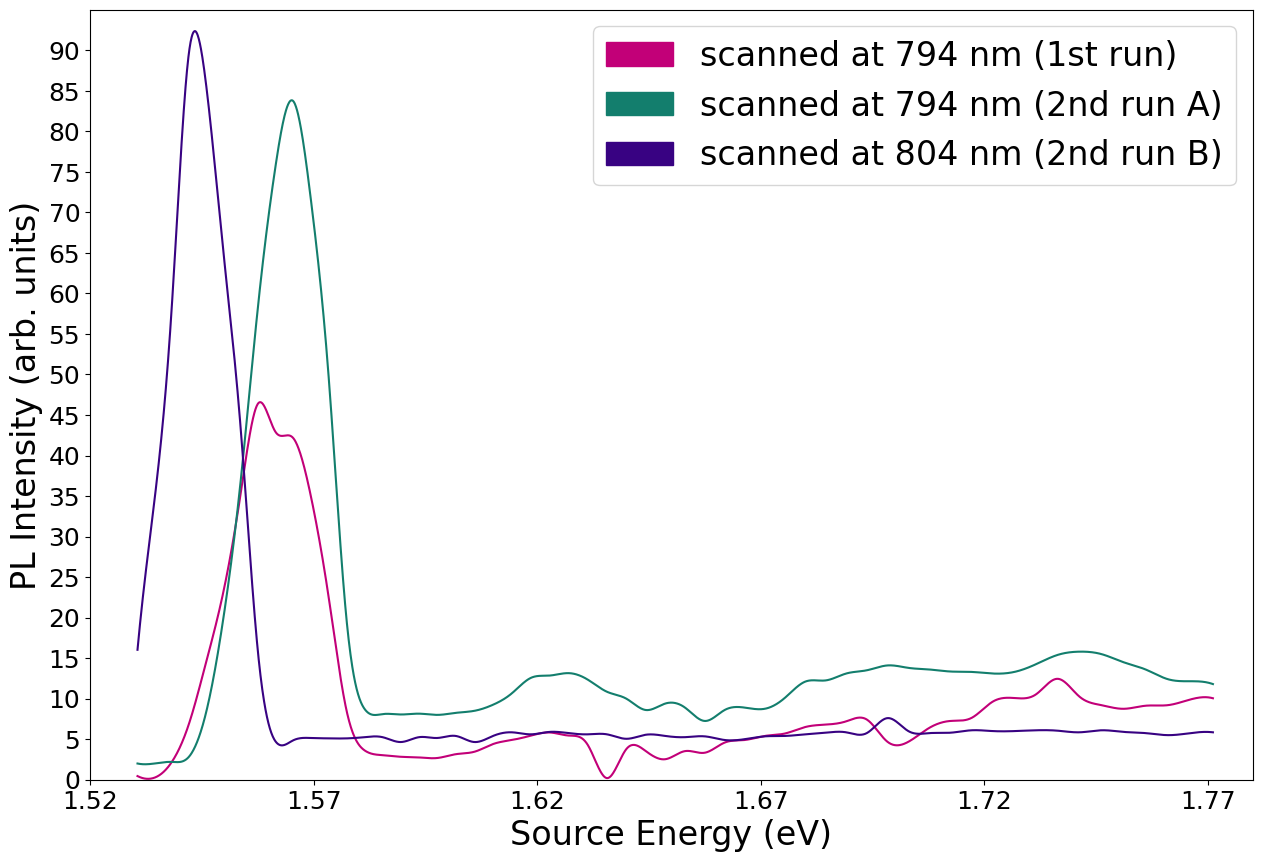

In [10]:
#Spline plot of data
#plt.plot(xnew40, y_new40, color='xkcd:blue green', label='scanned at 795 nm')
plt.plot(xnew40, z_new40, color='xkcd:magenta', label='scanned at 794 nm (1st run)')
plt.plot(xnew40, y_new40_3, color='xkcd:blue green', label='scanned at 794 nm (2nd run A)')
plt.plot(xnew40, z_new40_3, color='xkcd:indigo', label='scanned at 804 nm (2nd run B)')

plt.gcf().set_size_inches(15, 10) #sets the size of the plot
plt.legend(handles=[patch_8,patch_9,patch_10], loc='upper right') #inserts legend in the plot
plt.xlabel('Source Energy (eV)') #label for the x-axis
plt.ylabel('PL Intensity (arb. units)') #label for the y-axis
plt.xlim(1.52,1.78) #sets limit values for x-axis
plt.ylim(0,95) #sets limit values for y-axis
plt.xticks(np.arange(1.52,1.78, step=0.05)) #sets x-axis tick values
plt.yticks(np.arange(0,95,step=5)) #sets y-axis tick values
plt.show()

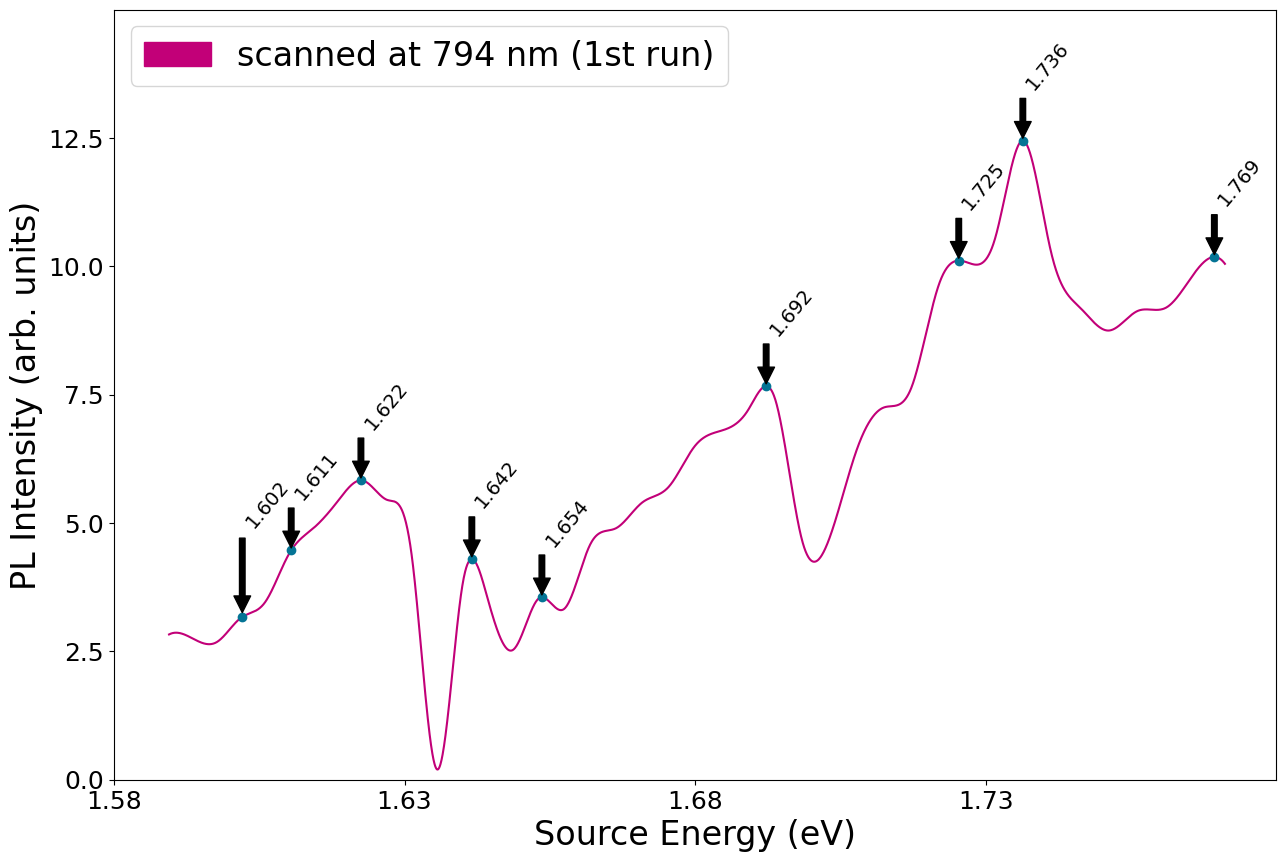

In [11]:
#Q040 (without 1C-1HH) PLE Data
dataframe10 = pd.read_excel('New PLE Data 2 (bigger focusing lens).xlsx', sheet_name='Q040 (without 1C-1HH)', usecols=[1])
dataframe11 = pd.read_excel('New PLE Data 2 (bigger focusing lens).xlsx', sheet_name='Q040 (without 1C-1HH)', usecols=[2])
dataframe12 = pd.read_excel('New PLE Data 2 (bigger focusing lens).xlsx', sheet_name='Q040 (without 1C-1HH)', usecols=[3])

dataframe10_3 = pd.read_excel('New PLE Data 3.xlsx', sheet_name='Q040 (without 1C-1HH)', usecols=[1])
dataframe11_3 = pd.read_excel('New PLE Data 3.xlsx', sheet_name='Q040 (without 1C-1HH)', usecols=[2])
dataframe12_3 = pd.read_excel('New PLE Data 3.xlsx', sheet_name='Q040 (without 1C-1HH)', usecols=[3])

#Convert dataframe to 1D arrays
x10 = dataframe10.to_numpy().reshape(-1)
y11 = dataframe11.to_numpy().reshape(-1)
z12 = dataframe12.to_numpy().reshape(-1)

x10_3 = dataframe10_3.to_numpy().reshape(-1)
y11_3 = dataframe11_3.to_numpy().reshape(-1)
z12_3 = dataframe12_3.to_numpy().reshape(-1)

#Making a spline of PLE Data
xnew40w = np.linspace(x10.min(), x10.max(), 3000)
gfg40w = spi.make_interp_spline(x10, y11, k=3)
y_new40w = gfg40w(xnew40w)

gfg402w = spi.make_interp_spline(x10, z12, k=3)
z_new40w = gfg402w(xnew40w)

gfg40w_3 = spi.make_interp_spline(x10_3, y11_3, k=3)
y_new40w_3 = gfg40w_3(xnew40w)

gfg402w_3 = spi.make_interp_spline(x10_3, z12_3, k=3)
z_new40w_3 = gfg402w_3(xnew40w)

#Finding peaks of spline data
#peaks40w, _ = sps.find_peaks(y_new40w, height=0.1, prominence=0.05)
#print(xnew40w[peaks40w])
#print(y_new40w[peaks40w])

peaks402w, _ = sps.find_peaks(z_new40w, height=0.1, prominence=0.05)
#print(xnew40w[peaks402w])
#print(z_new40w[peaks402w])

peaks40w_3, _ = sps.find_peaks(y_new40w_3, height=0.1, prominence=0.05)
#print(xnew40w[peaks40w])
#print(y_new40w[peaks40w])

peaks402w_3, _ = sps.find_peaks(z_new40w_3, height=0.1, prominence=0.05)
#print(xnew40w[peaks402w])
#print(z_new40w[peaks402w])

#Spline plot of data
#plt.plot(xnew40w, y_new40w, color='xkcd:blue green', label='scanned at 795 nm')
plt.plot(xnew40w, z_new40w, color='xkcd:magenta', label='scanned at 794 nm (1st run)')
#plt.plot(xnew40w, y_new40w_3, color='xkcd:blue green', label='scanned at 794 nm (2nd run A)')
#plt.plot(xnew40w, z_new40w_3, color='xkcd:indigo', label='scanned at 804 nm (2nd run B)')

#Plot of data peaks
#plt.plot(xnew40w[peaks40w], y_new40w[peaks40w], "o", color='xkcd:crimson')
plt.plot(xnew40w[peaks402w], z_new40w[peaks402w], "o", color='xkcd:sea blue')
#plt.plot(xnew40w[peaks40w_3], y_new40w_3[peaks40w_3], "o", color='xkcd:crimson')
#plt.plot(xnew40w[peaks402w_3], z_new40w_3[peaks402w_3], "o", color='xkcd:tomato')

#Labelling peaks with values
plt.plot(xnew40w[208], z_new40w[208], "o", color='xkcd:sea blue')
plt.annotate(np.round(xnew40w[208],3), (xnew40w[208], z_new40w[208]), xytext=(xnew40w[208], z_new40w[208]+1.75), 
                 rotation=50, arrowprops=dict(facecolor='black', shrink=0.05))

plt.plot(xnew40w[347], z_new40w[347], "o", color='xkcd:sea blue')
plt.annotate(np.round(xnew40w[347],3), (xnew40w[347], z_new40w[347]), xytext=(xnew40w[347], z_new40w[347]+1), 
                 rotation=50, arrowprops=dict(facecolor='black', shrink=0.05))

for i, txt in enumerate(np.round(xnew40w[peaks402w],3)):
    plt.annotate(txt, (xnew40w[peaks402w][i], z_new40w[peaks402w][i]), xytext=(xnew40w[peaks402w][i], z_new40w[peaks402w][i]+1), 
                 rotation=50, arrowprops=dict(facecolor='black', shrink=0.05))

plt.gcf().set_size_inches(15, 10) #sets the size of the plot
plt.legend(handles=[patch_8], loc='upper left') #inserts legend in the plot
plt.xlabel('Source Energy (eV)') #label for the x-axis
plt.ylabel('PL Intensity (arb. units)') #label for the y-axis
plt.xlim(1.58,1.78) #sets limit values for x-axis
plt.ylim(0,15) #sets limit values for y-axis
plt.xticks(np.arange(1.58,1.78, step=0.05)) #sets x-axis tick values
plt.yticks(np.arange(0,15,step=2.5)) #sets y-axis tick values
plt.show()

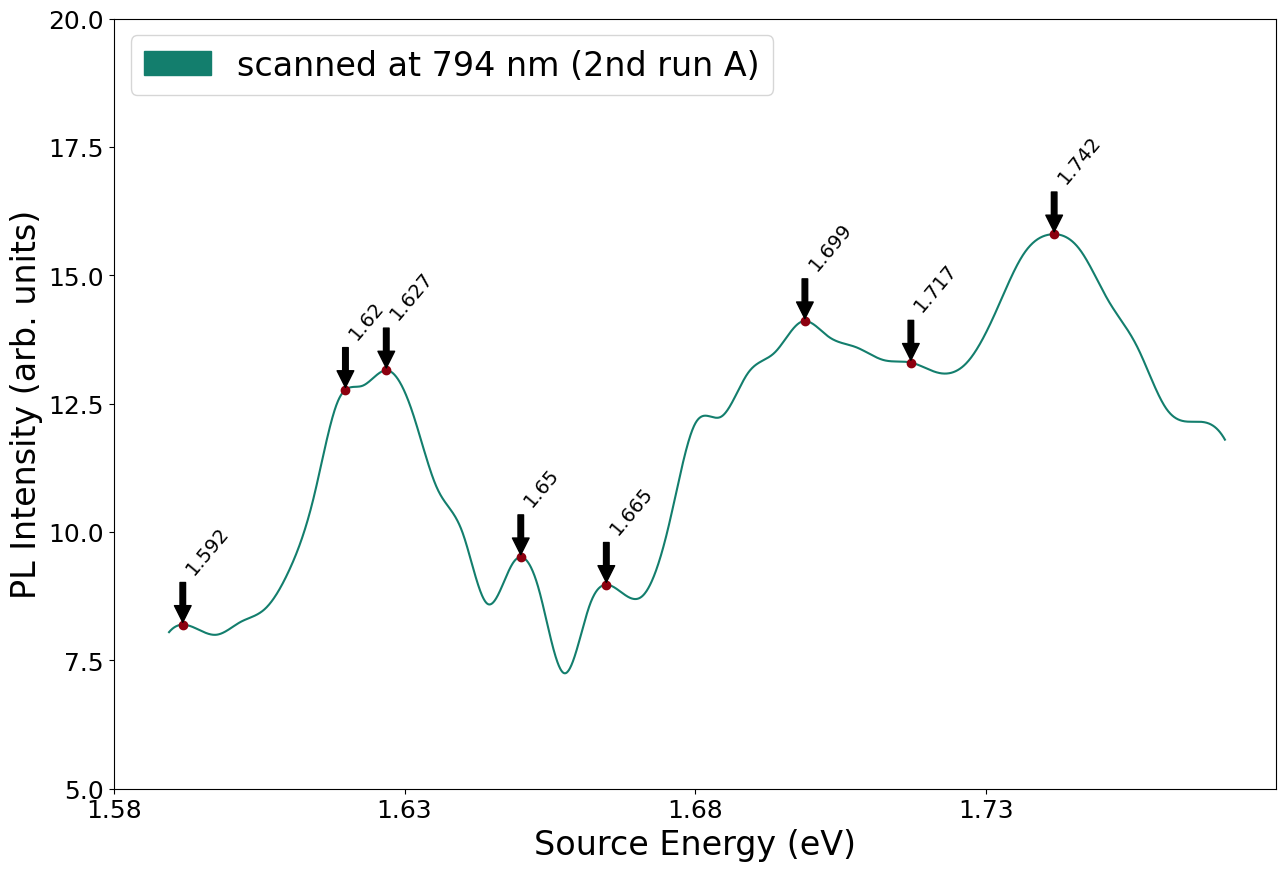

In [12]:
#Spline plot of data
#plt.plot(xnew40w, y_new40w, color='xkcd:blue green', label='scanned at 795 nm')
#plt.plot(xnew40w, z_new40w, color='xkcd:magenta', label='scanned at 794 nm (1st run)')
plt.plot(xnew40w, y_new40w_3, color='xkcd:blue green', label='scanned at 794 nm (2nd run A)')
#plt.plot(xnew40w, z_new40w_3, color='xkcd:indigo', label='scanned at 804 nm (2nd run B)')

#Plot of data peaks
#plt.plot(xnew40w[peaks40w], y_new40w[peaks40w], "o", color='xkcd:crimson')
#plt.plot(xnew40w[peaks402w], z_new40w[peaks402w], "o", color='xkcd:sea blue')
plt.plot(xnew40w[peaks40w_3], y_new40w_3[peaks40w_3], "o", color='xkcd:crimson')
#plt.plot(xnew40w[peaks402w_3], z_new40w_3[peaks402w_3], "o", color='xkcd:tomato')

#Labelling peaks with values
for i, txt in enumerate(np.round(xnew40w[peaks40w_3],3)):
    plt.annotate(txt, (xnew40w[peaks40w_3][i], y_new40w_3[peaks40w_3][i]), xytext=(xnew40w[peaks40w_3][i], y_new40w_3[peaks40w_3][i]+1), 
                 rotation=50, arrowprops=dict(facecolor='black', shrink=0.05))

plt.plot(xnew40w[501], y_new40w_3[501], "o", color='xkcd:crimson')
plt.annotate(np.round(xnew40w[501],3), (xnew40w[501], y_new40w_3[501]), xytext=(xnew40w[501], y_new40w_3[501]+1), 
                 rotation=50, arrowprops=dict(facecolor='black', shrink=0.05))

plt.plot(xnew40w[2107], y_new40w_3[2107], "o", color='xkcd:crimson')
plt.annotate(np.round(xnew40w[2107],3), (xnew40w[2107], y_new40w_3[2107]), xytext=(xnew40w[2107], y_new40w_3[2107]+1), 
                 rotation=50, arrowprops=dict(facecolor='black', shrink=0.05))

plt.gcf().set_size_inches(15, 10) #sets the size of the plot
plt.legend(handles=[patch_9], loc='upper left') #inserts legend in the plot
plt.xlabel('Source Energy (eV)') #label for the x-axis
plt.ylabel('PL Intensity (arb. units)') #label for the y-axis
plt.xlim(1.58,1.78) #sets limit values for x-axis
plt.ylim(5,20) #sets limit values for y-axis
plt.xticks(np.arange(1.58,1.78, step=0.05)) #sets x-axis tick values
plt.yticks(np.arange(5,21,step=2.5)) #sets y-axis tick values
plt.show()

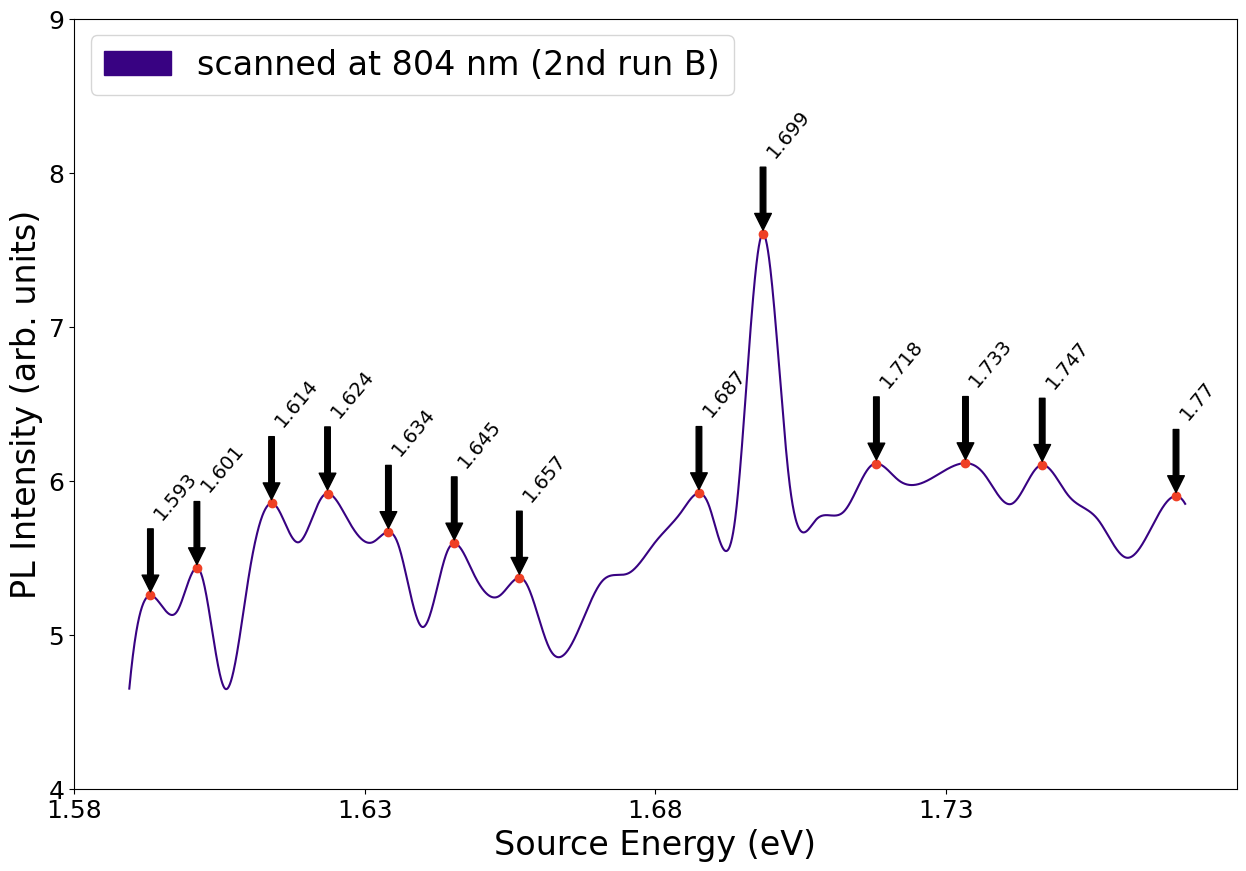

In [13]:
#Spline plot of data
#plt.plot(xnew40w, y_new40w, color='xkcd:blue green', label='scanned at 795 nm')
#plt.plot(xnew40w, z_new40w, color='xkcd:magenta', label='scanned at 794 nm (1st run)')
#plt.plot(xnew40w, y_new40w_3, color='xkcd:blue green', label='scanned at 794 nm (2nd run A)')
plt.plot(xnew40w, z_new40w_3, color='xkcd:indigo', label='scanned at 804 nm (2nd run B)')

#Plot of data peaks
#plt.plot(xnew40w[peaks40w], y_new40w[peaks40w], "o", color='xkcd:crimson')
#plt.plot(xnew40w[peaks402w], z_new40w[peaks402w], "o", color='xkcd:sea blue')
#plt.plot(xnew40w[peaks40w_3], y_new40w_3[peaks40w_3], "o", color='xkcd:crimson')
plt.plot(xnew40w[peaks402w_3], z_new40w_3[peaks402w_3], "o", color='xkcd:tomato')

#Labelling peaks with values
for i, txt in enumerate(np.round(xnew40w[peaks402w_3],3)):
    plt.annotate(txt, (xnew40w[peaks402w_3][i], z_new40w_3[peaks402w_3][i]), xytext=(xnew40w[peaks402w_3][i], z_new40w_3[peaks402w_3][i]+0.5), 
                 rotation=50, arrowprops=dict(facecolor='black', shrink=0.05))

plt.gcf().set_size_inches(15, 10) #sets the size of the plot
plt.legend(handles=[patch_10], loc='upper left') #inserts legend in the plot
plt.xlabel('Source Energy (eV)') #label for the x-axis
plt.ylabel('PL Intensity (arb. units)') #label for the y-axis
plt.xlim(1.58,1.78) #sets limit values for x-axis
plt.ylim(4,9) #sets limit values for y-axis
plt.xticks(np.arange(1.58,1.78, step=0.05)) #sets x-axis tick values
plt.yticks(np.arange(4,10,step=1)) #sets y-axis tick values
plt.show()

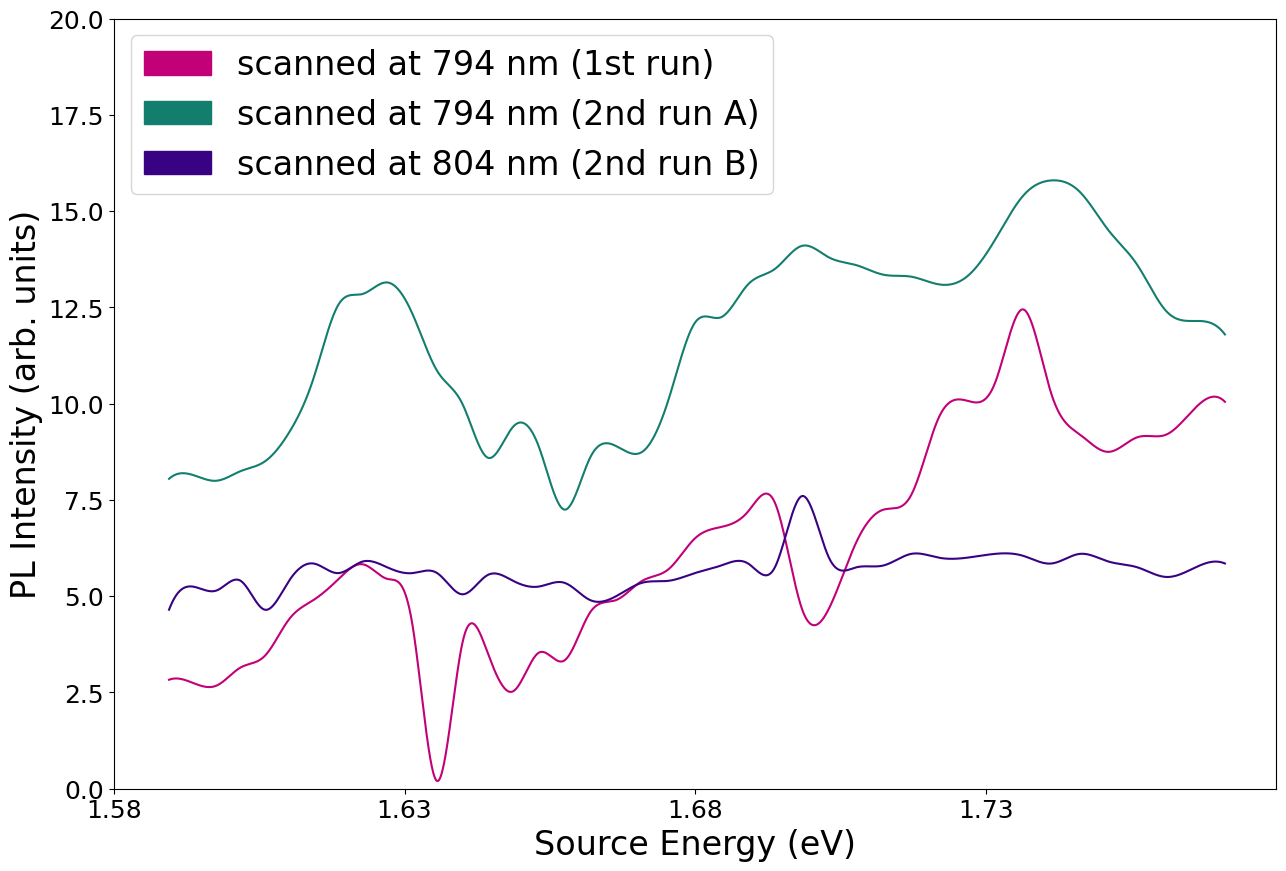

In [14]:
#Spline plot of data
#plt.plot(xnew40w, y_new40w, color='xkcd:blue green', label='scanned at 795 nm')
plt.plot(xnew40w, z_new40w, color='xkcd:magenta', label='scanned at 794 nm (1st run)')
plt.plot(xnew40w, y_new40w_3, color='xkcd:blue green', label='scanned at 794 nm (2nd run A)')
plt.plot(xnew40w, z_new40w_3, color='xkcd:indigo', label='scanned at 804 nm (2nd run B)')

plt.gcf().set_size_inches(15, 10) #sets the size of the plot
plt.legend(handles=[patch_8,patch_9,patch_10], loc='upper left') #inserts legend in the plot
plt.xlabel('Source Energy (eV)') #label for the x-axis
plt.ylabel('PL Intensity (arb. units)') #label for the y-axis
plt.xlim(1.58,1.78) #sets limit values for x-axis
plt.ylim(0,20) #sets limit values for y-axis
plt.xticks(np.arange(1.58,1.78, step=0.05)) #sets x-axis tick values
plt.yticks(np.arange(0,21,step=2.5)) #sets y-axis tick values
plt.show()